In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
train = pd.read_csv("train.csv")
print("Number of Rows = " + str(len(train)))
print()
print("Number of Rows with missing values by column:")
pd.isnull(train).sum()

Number of Rows = 891

Number of Rows with missing values by column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribution of Survival Rates by Age

C:\Users\Mateusz\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
C:\Users\Mateusz\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0.5, 1.0, 'Distribution of Age of Survivors and Non-Survivors')

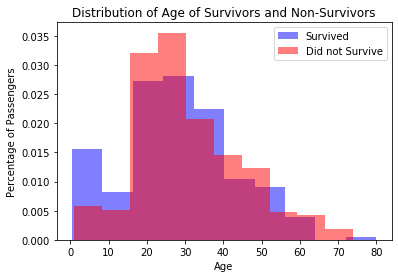

In [5]:
age_survived = train.loc[train['Survived']==1, "Age"]
age_survived.plot.hist(fc=(0, 0, 1, 0.5), normed=1, label="Survived")
age_did_not_survive = train.loc[train['Survived']==0, "Age"]
age_did_not_survive.plot.hist(fc=(1, 0, 0, 0.5), normed=1, label="Did not Survive")
plt.xlabel("Age")
plt.ylabel("Percentage of Passengers")
plt.legend(loc='upper right')
plt.title("Distribution of Age of Survivors and Non-Survivors")

In [6]:
train = train[np.isfinite(train['Age'])]
print("Number of Rows = " + str(len(train)))

Number of Rows = 714


Text(0.5, 1.0, 'Percentage of Survivors by Class')

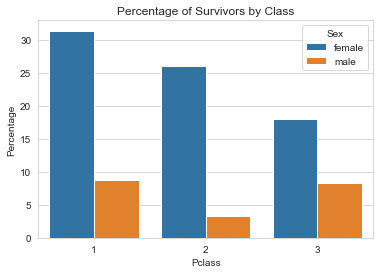

In [7]:
# Survived 
num_males = len(train.loc[train["Sex"]=="male",])
num_females = len(train.loc[train["Sex"]=="female",])

rates = train.loc[train["Survived"]==1, ["Pclass","Sex","PassengerId"]]
rates = pd.DataFrame(rates.groupby(["Pclass","Sex"]).count())
rates.reset_index(inplace=True)  
rates["Percentage"]=0

# adding a percentage column to show the percentage of males and females
for row in range(len(rates)):
    if rates.loc[row,"Sex"]=="male":
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_males)*100,2)
    else:
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_females)*100,2)

sns.set_style("whitegrid")
sns.barplot(x="Pclass", y="Percentage", hue="Sex", data=rates).set_title("Percentage of Survivors by Class")

0.06595969200134277


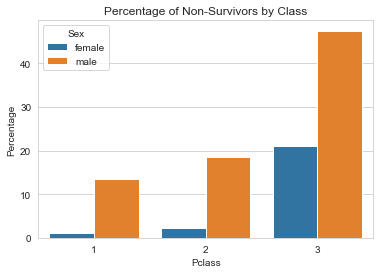

In [11]:
# Did not Survive
import time
start = time.time()

num_males = len(train.loc[train["Sex"]=="male",])
num_females = len(train.loc[train["Sex"]=="female",])

rates = train.loc[train["Survived"]==0, ["Pclass","Sex","PassengerId"]]
rates = pd.DataFrame(rates.groupby(["Pclass","Sex"]).count())
rates.reset_index(inplace=True)  
rates["Percentage"]=0 

# adding a percentage column to show the percentage of males and females
for row in range(len(rates)):
    if rates.loc[row,"Sex"]=="male":
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_males)*100,2)
    else:
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_females)*100,2)

sns.set_style("whitegrid")
sns.barplot(x="Pclass", y="Percentage", hue="Sex", data=rates).set_title("Percentage of Non-Survivors by Class")

end = time.time()
print(end - start)

Is ticket Class more important than Age?


Text(0.5, 1.0, 'Proportion of Passengers by Ticket Classes')

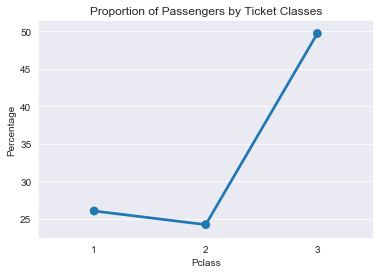

In [12]:
num_passengers = len(train)
classes = pd.DataFrame(train.groupby(["Pclass"]).count())
classes.reset_index(inplace=True)
classes["Percentage"] = round(classes["PassengerId"].div(num_passengers)*100,2)

sns.set_style("darkgrid")
sns.pointplot(x="Pclass", y="Percentage", data=classes).set_title("Proportion of Passengers by Ticket Classes")

Number of Survivors and Non-Survivors by Ticket Class

Text(0.5, 1.0, 'Age Distribution of Survivors by Ticket Class')

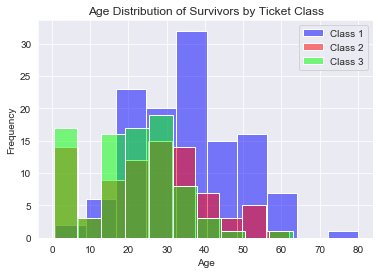

In [13]:
survivors_1 = train.loc[(train["Survived"]==1)&(train["Pclass"]==1), "Age"]
survivors_2 = train.loc[(train["Survived"]==1)&(train["Pclass"]==2), "Age"]
survivors_3 = train.loc[(train["Survived"]==1)&(train["Pclass"]==3), "Age"]

survivors_1.plot.hist(fc=(0, 0, 1, 0.5), label="Class 1")
survivors_2.plot.hist(fc=(1, 0, 0, 0.5), label="Class 2")
survivors_3.plot.hist(fc=(0, 1, 0, 0.5), label="Class 3")
plt.xlabel("Age")
plt.legend(loc='upper right')
plt.title("Age Distribution of Survivors by Ticket Class")